In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/gold price prediction/gld_price_data.csv')

Analyzation +Visulization

In [5]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
# checking thw numbers of issing values
df.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [9]:
# geting the statistical measures
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


corelaction
+ve
-ve

In [11]:
#  change the type of date

import pandas as pd
df['Date'] = pd.to_datetime(df['Date'])


In [22]:
correlation = df.corr()

<Axes: >

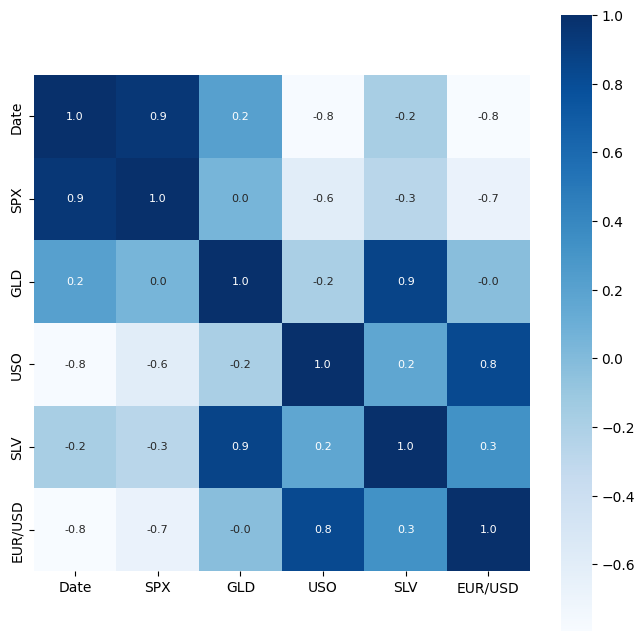

In [23]:
# constructing the heat map to understanding the corelation
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True,square=True , fmt='.1f',annot= True,annot_kws={'size':8},cmap= 'Blues')

In [24]:
print(correlation['GLD'])

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


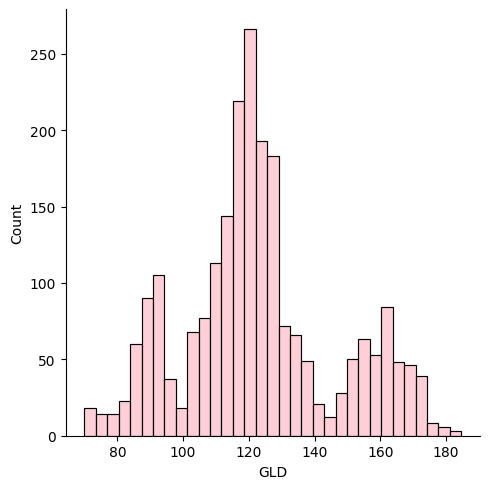

In [25]:
sns.displot(df.GLD,color='pink')

seprating the feature and target column

In [27]:
X = df.drop(['Date','GLD'],axis=1)
Y = df['GLD']

In [28]:
# spliting into train and test split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [29]:
X_train.shape

(1832, 4)

In [30]:
X_test.shape

(458, 4)

applying mode

In [42]:
model = RandomForestRegressor(n_estimators=100)


In [43]:
model.fit(X_train, Y_train)

RandomForestRegressor()

In [50]:
pridec = model.predict(X_test)

In [49]:

print('The accuracy on test data',model.score(X_test,Y_test))
print('accuracy on train data',model.score(X_train,Y_train))

The accuracy on test data 0.9895217957543934
accuracy on train data 0.9985419045021985


In [52]:
# R score
from sklearn import metrics
error_Score = metrics.r2_score(Y_test, pridec)
print("R squared error : ", error_Score)



R squared error :  0.9895217957543934


In [53]:
Y_test = list(Y_test)

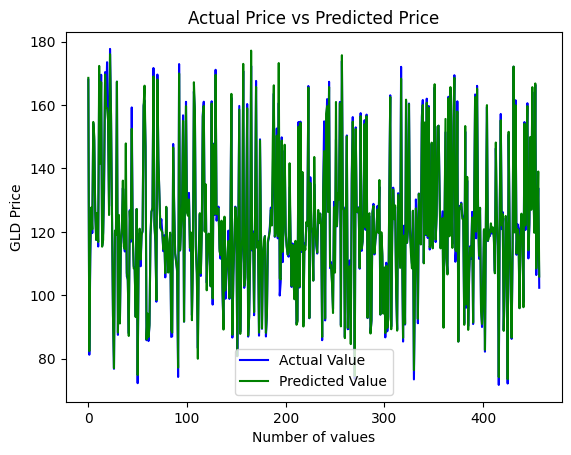

In [56]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(pridec, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()